In [1]:
import numpy as np  
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import math

%matplotlib notebook

plt.style.use("ggplot")

In [2]:
#Define function containing the ODEs. 
def ndfl(v,t,p,inducer):  
    kmr, kmr0,  kdmr, kpr,  kdpr, K, c, kdprGFP = p 
    mtetR, mluxR, mcI, ptetR, pluxR, pcI, mGFP, pGFP = v
    #If there is no inducer, remove the inhibitory term from the rate of tetR production and simplify the ODE. 
    if inducer == False: 
        ratemtetRprod =  kmr + kmr0
    #If the inducer is present, LuxR works as a repressor and is modelled similarly to the other two repressors. 
    else: 
        ratemtetRprod =  kmr*(K**c/(K**c+pluxR**c)) + kmr0
    ratemluxRprod =  kmr*(K**c/(K**c+pcI**c)) +  kmr0
    ratemcIprod   =  kmr*(K**c/(K**c+ptetR**c)) +  kmr0
    ratemGFPprod  = kmr*(K**c/(K**c+pcI**c)) + kmr0

    rateptetRprod =  kpr*mtetR
    ratepluxRprod =  kpr*mluxR
    ratepcIprod   =  kpr*mcI
    ratepGFPprod  = kpr*mGFP

    ratemtetRloss =  kdmr*mtetR
    ratemluxRloss =  kdmr*mluxR
    ratemcIloss   =  kdmr*mcI
    ratemGFPloss  = kdmr*mGFP

    rateptetRloss =  kdpr*ptetR
    ratepluxRloss =  kdpr*pluxR
    ratepcIloss   =  kdpr*pcI 
    ratepGFPloss  = kdprGFP*pGFP

    dmtetR = ratemtetRprod - ratemtetRloss
    dmluxR = ratemluxRprod - ratemluxRloss
    dmcI   = ratemcIprod - ratemcIloss
    dmGFP  = ratemGFPprod - ratemGFPloss

    dptetR = rateptetRprod - rateptetRloss
    dpluxR = ratepluxRprod - ratepluxRloss
    dpcI   = ratepcIprod - ratepcIloss
    dpGFP  = ratepGFPprod - ratepGFPloss

    dv = [dmtetR, dmluxR, dmcI, dptetR, dpluxR, dpcI, dmGFP, dpGFP]
    return dv


In [3]:
#Set the parameeters for the simulation
kmr = 30
kmr0 = 0.03
kdmr = 0.3466
kpr = 6.931
kdpr = 0.06931

K = 40
c = 2

#60 minutes is the average half-life for GFP and to simplify the interpretation. 
kdprGFP = math.log(2)/(60)




p = [ kmr, kmr0, kdmr, kpr, kdpr, K, c, kdprGFP ]

#Set the variables. 
mGFP0  = 0 
pGFP0  = 0 
mtetR0 = 5
mluxR0 = 0
mcI0   = 0

ptetR0 = 0
pluxR0 = 0
pcI0   = 0

v0 = [ mtetR0, mluxR0, mcI0, mGFP0, ptetR0, pluxR0, pcI0, pGFP0 ]

#Is there inducer in the bacterium?
inducer = False

tmax = 800
tobs = np.linspace(0,tmax,tmax+1) 

In [4]:
#Run simulation and store the results. 
vobs = odeint(ndfl,v0,tobs,args=(p,inducer))  

mtetRobs = vobs[:,0]
mluxRobs = vobs[:,1]
mcIobs =   vobs[:,2]

ptetRobs = vobs[:,3]
pluxRobs = vobs[:,4]
pcIobs =   vobs[:,5]
pGFPobs =  vobs[:,7]

<IPython.core.display.Javascript object>


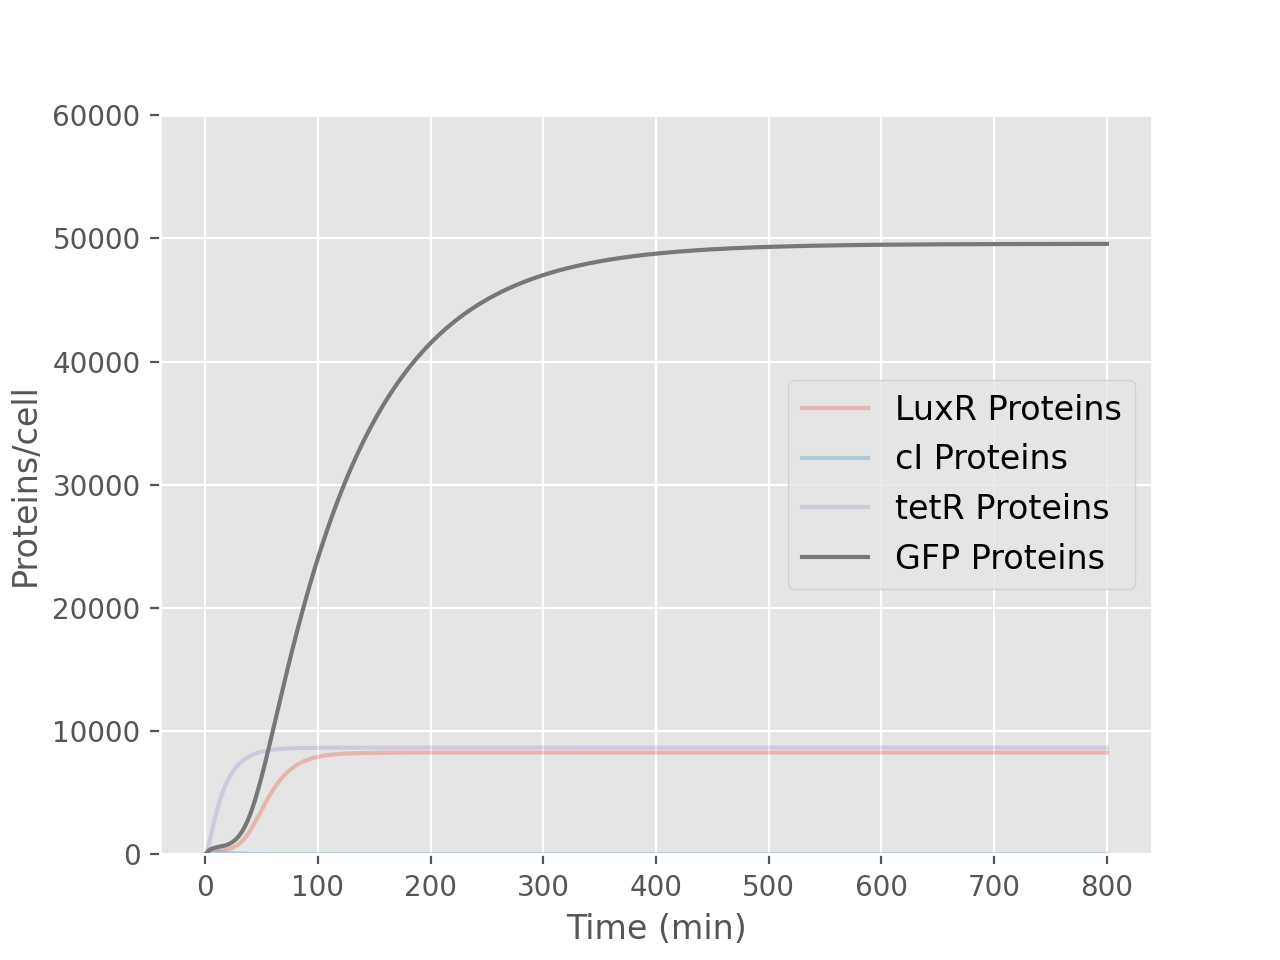

In [5]:
#Plot the simulation results. 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tobs, pluxRobs, label = "LuxR Proteins", alpha = 0.3)
ax.plot(tobs, pcIobs, label = "cI Proteins", alpha = 0.3)
ax.plot(tobs, ptetRobs, label = "tetR Proteins", alpha = 0.3)
ax.plot(tobs, pGFPobs, label = "GFP Proteins")
ax.set(xlabel = "Time (min)", ylabel = "Proteins/cell", ylim = (0,60000))
ax.legend(fontsize = "large")
plt.savefig("Negative Feedback Loop LuxR.png", dpi = 350)

# Repressilator Simulation at Stable Steady-State 

In [6]:
#Set the variables. 
mtetR0 = 5
mluxR0 = 0
mcI0   = 0

ptetR0 = 0
pluxR0 = 0
pcI0   = 0

v0 = [ mtetR0, mluxR0, mcI0, ptetR0, pluxR0, pcI0, mGFP0, pGFP0 ]

#Is there inducer in the bacterium?
inducer = True

#Run simulation and store the results. 

vobsv = odeint(ndfl,v0,tobs,args=(p, inducer))  

mtetRobsv = vobsv[:,0]
mluxRobsv = vobsv[:,1]
mcIobsv =   vobsv[:,2]

ptetRobsv = vobsv[:,3]
pluxRobsv = vobsv[:,4]
pcIobsv =   vobsv[:,5]
pGFPobs =  vobsv[:,7]

<IPython.core.display.Javascript object>


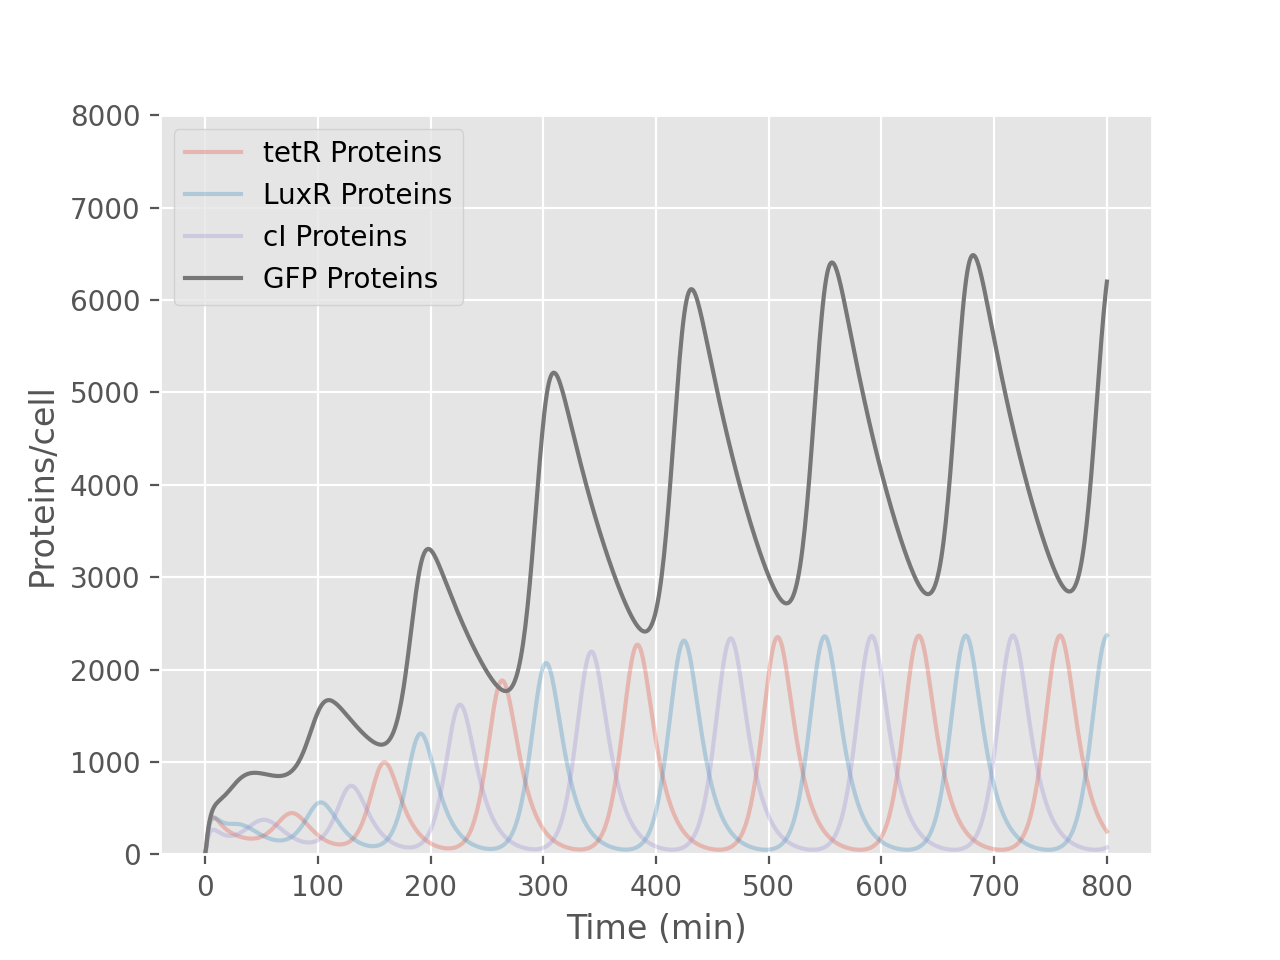

In [7]:
#Plot the simulation results. 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tobs, ptetRobsv, label = "tetR Proteins", alpha = 0.3)
ax.plot(tobs, pluxRobsv, label = "LuxR Proteins", alpha = 0.3)
ax.plot(tobs, pcIobsv, label = "cI Proteins", alpha = 0.3)
ax.plot(tobs, pGFPobs, label = "GFP Proteins")
ax.set( xlabel = "Time (min)", ylabel = "Proteins/cell", ylim = (0,8000))
ax.legend()
plt.savefig("Steady state with no oscillations LuxR", dpi = 350)

# 3D Phase Space Plot of the Repressilator Model During Oscillation

In [8]:
#Set the variables. 
mtetR0 = 5
mluxR = 0
mcI0   = 0

ptetR0 = 0
pluxR = 0
pcI0   = 0

v0 = [ mtetR0, mluxR0, mcI0, ptetR0, pluxR0, pcI0, mGFP0, pGFP0 ]

#Run simulation and store the results. 

vobs = odeint(ndfl,v0,tobs,args=(p, inducer)) 
#Eliminate some transient behaviour to make the graph more clear, but leave some to show the convergence to the attractor. 
#To be more precise, we first store the initial transient behaviour.
vobstransient = vobs[0:100]
vobs = vobs[100:]
mtetRobs = vobs[:,0]
mluxRobs = vobs[:,1]
mcIobs =   vobs[:,2]
ptetRobs = vobs[:,3]
pluxRobs = vobs[:,4]
pcIobs =   vobs[:,5]

<IPython.core.display.Javascript object>


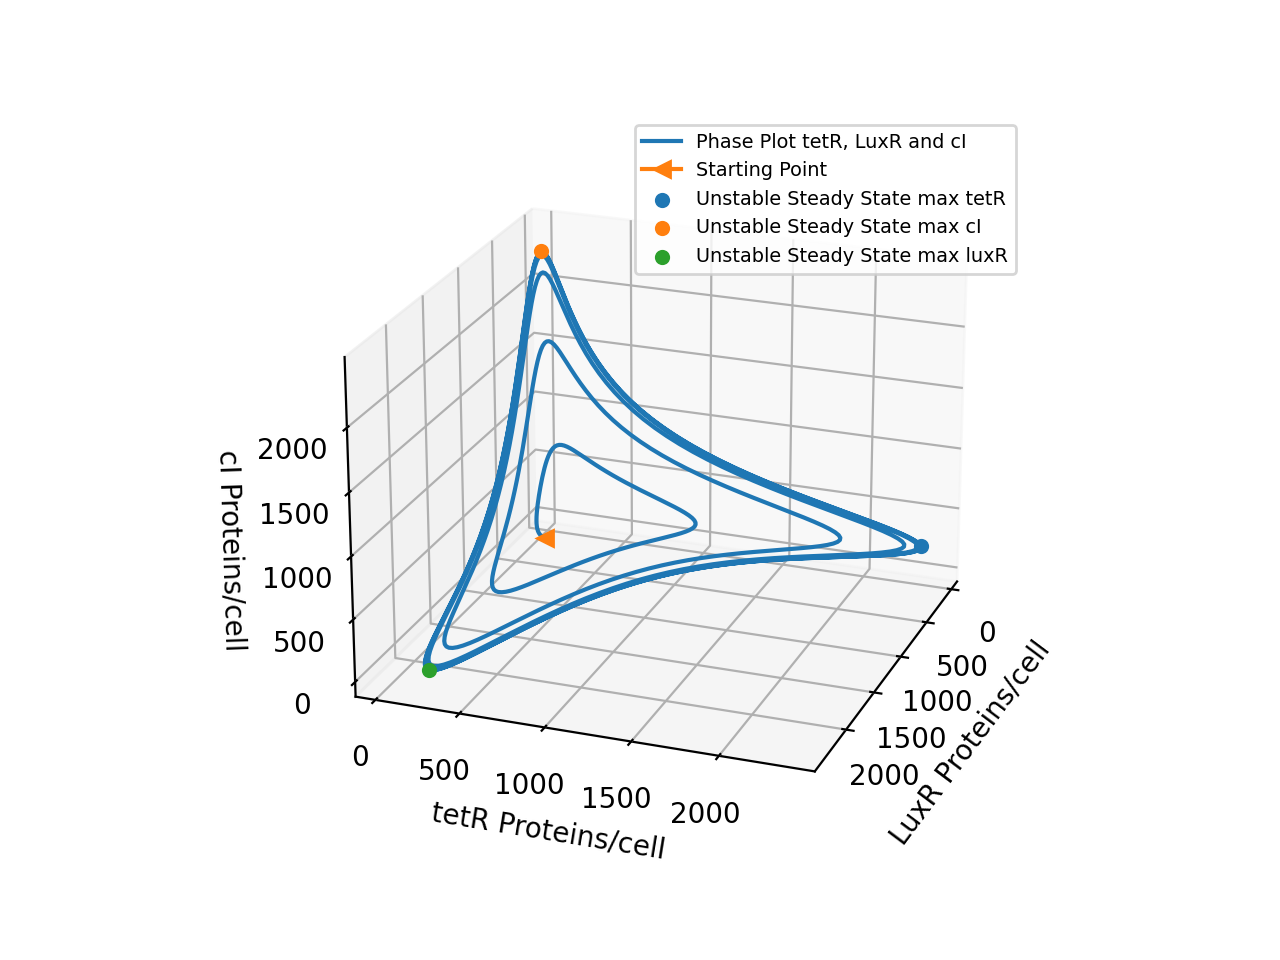

In [9]:
#Set style to default as other custom styles tend to result in glitches or unwanted overlaps when plotting in 3D.

plt.style.use("default")

#Plot the phase diagram in three dimensions to show the repressors unstable steady states and their relationships all in one plot. 

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(pluxRobs, ptetRobs, pcIobs, label = "Phase Plot tetR, LuxR and cI")
#ax.plot(np.argmax(pluxRobs), 0, 0, label = "Steady State pluxRobs")

#Find unstable steady states by finding the highest or lowest reached of each repressor protein at which dP = 0.

ax.scatter(pluxRobs[np.argmax(ptetRobs)], ptetRobs[np.argmax(ptetRobs)], pcIobs[np.argmax(ptetRobs)], label = "Unstable Steady State max tetR")
ax.scatter(pluxRobs[np.argmax(pcIobs)], ptetRobs[np.argmax(pcIobs)], pcIobs[np.argmax(pcIobs)], label = "Unstable Steady State max cI")
ax.scatter(pluxRobs[np.argmax(pluxRobs)], ptetRobs[np.argmax(pluxRobs)], pcIobs[np.argmax(pluxRobs)], label = "Unstable Steady State max luxR")
 
#Plot starting point of the simulation on the graph. 

ax.plot(pluxRobs[0], ptetRobs[0], pcIobs[0], "<-", label = "Starting Point")
ax.set( xlabel = "LuxR Proteins/cell", ylabel = "tetR Proteins/cell", zlabel = "cI Proteins/cell")
ax.legend(fontsize = "x-small")
plt.savefig("3D Diagram Phase Plot standard LuxR.png", dpi = 350)

#If an interactive code noteboo is being used, change the orientation of the graph to obtain the one used in the report. 


<IPython.core.display.Javascript object>


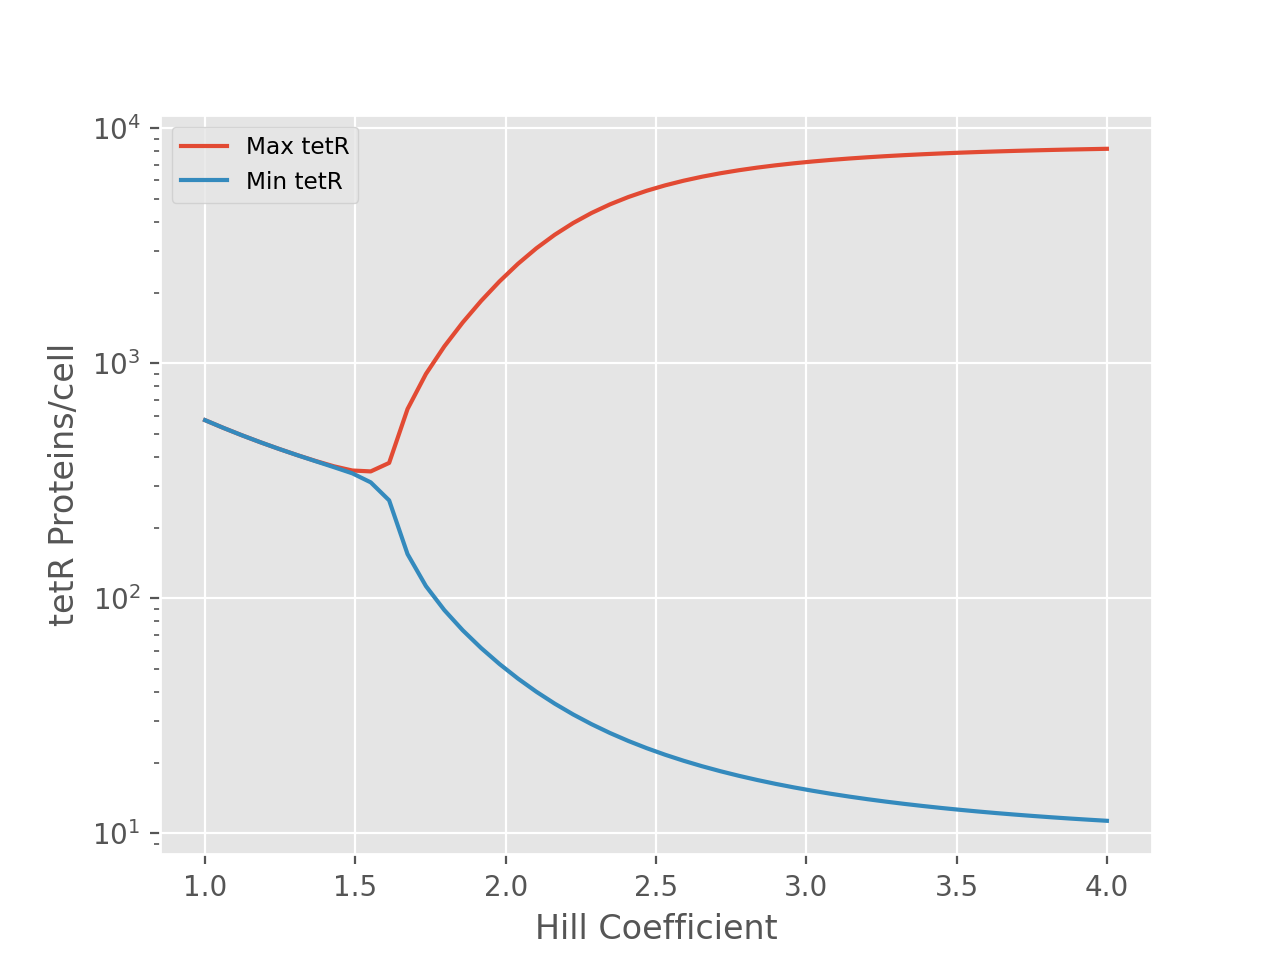

In [10]:
cvals = np.linspace(1,4,50)
ptetRmaxvals = []
ptetRminvals = []

#For a bifurcation plot, we want to make sure to eliminate the transient behaviour, so, set a long simulation time and then trim 1500 from it. 

tmax = 10000
tobs = np.linspace(0,tmax, tmax+1) #1 Observation per minute.

#Write a loop to run different simulations for each n value being tested and store the results for the min and max levels reached. 

for c in cvals: 
    p = [ kmr, kmr0, kdmr, kpr, kdpr, K, c, kdprGFP ]
    vobs = odeint(ndfl,v0,tobs,args=(p, inducer))  
    vobs = vobs[500:]
    ptetRobs = vobs[:,3]
    ptetRmaxvals.append(ptetRobs[np.argmax(ptetRobs)])
    ptetRminvals.append(ptetRobs[np.argmin(ptetRobs)])

#Plot the max and min values against the Hill coefficient of their correspondent simulation. 

plt.style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cvals, ptetRmaxvals, label = "Max tetR")
ax.plot(cvals, ptetRminvals, label = "Min tetR")
plt.yscale("log")
ax.set( xlabel = "Hill Coefficient", ylabel = "tetR Proteins/cell",)
ax.legend(fontsize = "small")
plt.savefig("Bifurcation plot of tetR with LuxR", dpi = 350)